In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/HeartDiesease.csv')
data.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [124]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [125]:
Y=data["target"]
X=data.drop("target",axis=1)

In [126]:
sc = StandardScaler()
X=sc.fit_transform(X)

In [127]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [128]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((892, 11), (298, 11), (892,), (298,))

### Logistic Regression Classifier

In [129]:
clf = LogisticRegression(n_jobs=-1,C=0.1)
clf.fit(x_train,y_train)
cvalidate = cross_validate(clf,X,Y,cv=5,scoring="accuracy",return_train_score=True)
print("test_score",cvalidate["test_score"].mean())
print("train_score",cvalidate["train_score"].mean())
# cvalidate

test_score 0.8184873949579832
train_score 0.8367647058823529


<Figure size 200x200 with 0 Axes>

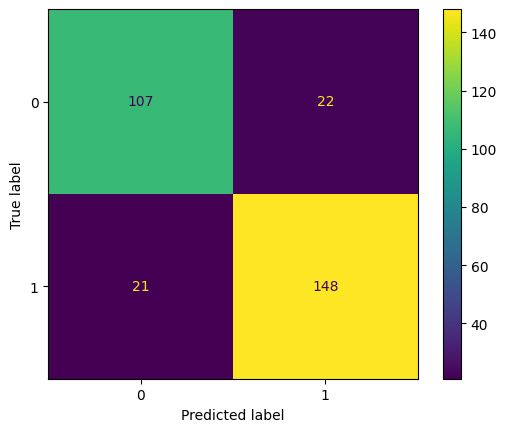

In [130]:
cnfmx = confusion_matrix(y_test,clf.predict(x_test))
plt.figure(figsize=(2,2))
cnfmxDisplay = ConfusionMatrixDisplay(cnfmx,display_labels=clf.classes_)
cnfmxDisplay.plot()
plt.show()

#### Observation :
TPR and TNR are very good in numbers, means model is good

TPR = TP / TP + FN = 0.87

TNR = TN / TN + FP = 0.82

In [131]:
precision = precision_score(y_test, clf.predict(x_test), average='binary')
recall = recall_score(y_test, clf.predict(x_test), average='binary')
f1_score = f1_score(y_test, clf.predict(x_test), average='binary')
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F1 Score: %.3f' % f1_score)

Precision: 0.871
Recall: 0.876
F1 Score: 0.873


## Support Vector Classifier

In [132]:
clf = SVC(kernel="linear")
clf.fit(x_train,y_train)
cvalidate = cross_validate(clf,X,Y,cv=5,scoring="accuracy",return_train_score=True)
print("test_score",cvalidate["test_score"].mean())
print("train_score",cvalidate["train_score"].mean())

test_score 0.8210084033613445
train_score 0.8403361344537814


<Figure size 200x200 with 0 Axes>

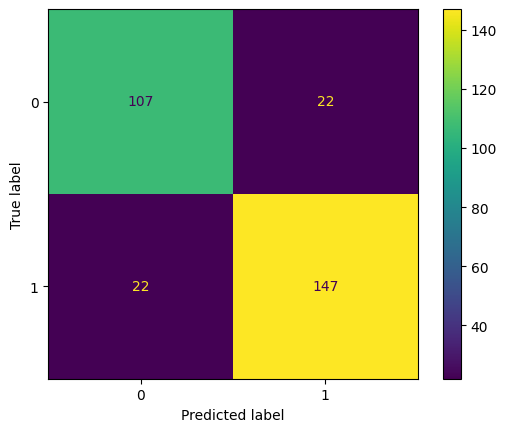

In [133]:
cnfmx = confusion_matrix(y_test,clf.predict(x_test))
plt.figure(figsize=(2,2))
cnfmxDisplay = ConfusionMatrixDisplay(cnfmx,display_labels=clf.classes_)
cnfmxDisplay.plot()
plt.show()

#### Observation :
TPR and TNR are very good in numbers, means model is good

TPR = TP / TP + FN = 0.86

TNR = TN / TN + FP = 0.82

In [134]:
precision = precision_score(y_test, clf.predict(x_test))
recall = recall_score(y_test, clf.predict(x_test))
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)

Precision: 0.870
Recall: 0.870


## RandomForest Classifier

In [135]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)
clf = RandomForestClassifier(criterion="log_loss")
clf.fit(x_train,y_train)
cvalidate = cross_validate(clf,X,Y,cv=5,scoring="accuracy",return_train_score=True)
print("test_score",cvalidate["test_score"].mean())
print("train_score",cvalidate["train_score"].mean())

test_score 0.926890756302521
train_score 1.0


<Figure size 200x200 with 0 Axes>

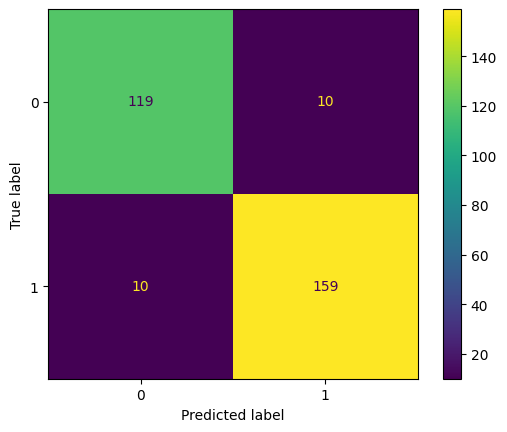

Precision: 0.941
Recall: 0.941


In [136]:
cnfmx = confusion_matrix(y_test,clf.predict(x_test))
plt.figure(figsize=(2,2))
cnfmxDisplay = ConfusionMatrixDisplay(cnfmx,display_labels=clf.classes_)
cnfmxDisplay.plot()
plt.show()


precision = precision_score(y_test, clf.predict(x_test))
recall = recall_score(y_test, clf.predict(x_test))
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)

#### Observation :
TPR and TNR are very good in numbers, means model is good

TPR = TP / TP + FN = 0.94

TNR = TN / TN + FP = 0.92

# Deploye and Validate Model

In [137]:
import pickle
pickle.dump(clf,open("hdmodel.pkl","wb"))

In [138]:
def predict(input1):
    loaded_model = pickle.load(open("hdmodel.pkl","rb"))
    res=loaded_model.predict(input1)[0]
    if res == 0:
      print("no heart disease")
    else:
      print("heart disease")


In [139]:
#age                    40
#sex                    1
#chest pain type        2
#resting bp s           140
#cholesterol            289
#fasting blood sugar    0
#resting ecg            0
#max heart rate         172
#exercise angina        0
#oldpeak                0.0
#ST slope               1

input_data = [40,1,2,140,289,0,0,172,0,0.0,1]
predict([input_data])

no heart disease
